### Kaggle Competition - BBC News Classification

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns


import os
print(os.listdir("dataset"))


['BBC News Sample Solution.csv', 'BBC News Test.csv', 'BBC News Train.csv']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ArticleId  1490 non-null   int64 
 1   Text       1490 non-null   object
 2   Category   1490 non-null   object
dtypes: int64(1), object(2)
memory usage: 35.0+ KB
None 

         ArticleId
count  1490.000000
mean   1119.696644
std     641.826283
min       2.000000
25%     565.250000
50%    1112.500000
75%    1680.750000
max    2224.000000 

   ArticleId                                               Text  Category
0       1833  worldcom ex-boss launches defence lawyers defe...  business
1        154  german business confidence slides german busin...  business
2       1101  bbc poll indicates economic gloom citizens in ...  business
3       1976  lifestyle  governs mobile choice  faster  bett...      tech
4        917  enron bosses in $168m payout eighteen former e...  business 



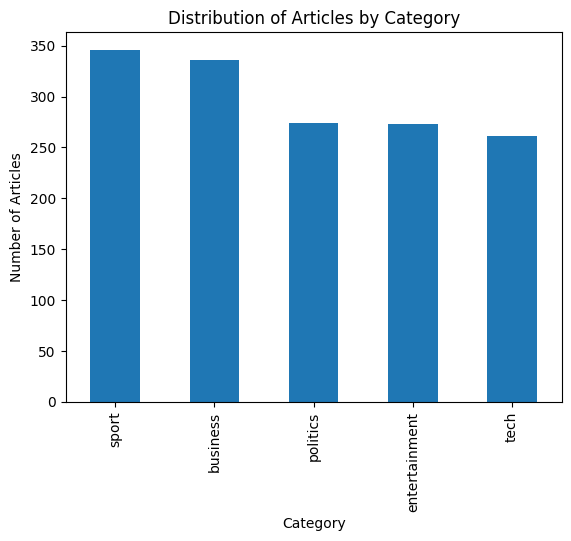

In [29]:
df = pd.read_csv('dataset/BBC News Train.csv')

print(df.info(), "\n")
print(df.describe(), "\n")
print(df.head(), "\n")


# Categories
df['Category'].value_counts().plot(kind='bar')
plt.title('Distribution of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

## TEXT LENGTH

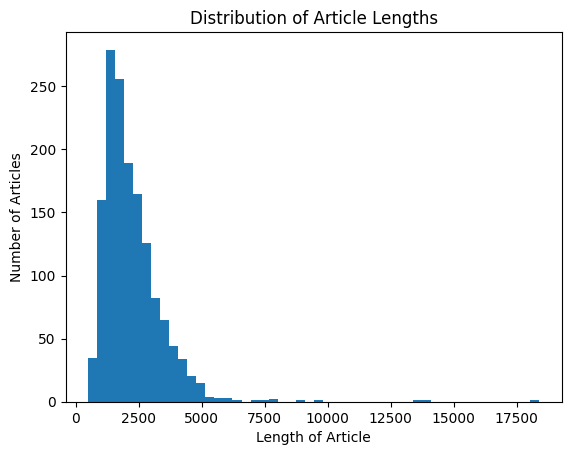

In [30]:
df['text_length'] = df['Text'].apply(len)
df['text_length'].plot(kind='hist', bins=50)
plt.title('Distribution of Article Lengths')
plt.xlabel('Length of Article')
plt.ylabel('Number of Articles')
plt.show()

### **Just for fun, let's see what words are most used in the articles**

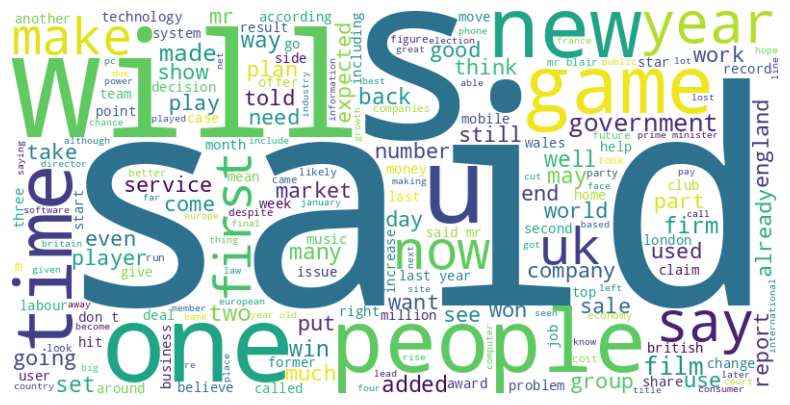

In [31]:
from wordcloud import WordCloud

text = ' '.join(df['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### STOP WORDS
- Definition: Stop words are commonly used words in a language that are often filtered out before processing text data. These words typically include articles, prepositions, conjunctions, and other words that do not carry significant meaning or contribute to the text's semantic content.

- Purpose: Removing stop words can help reduce the dimensionality of the text data and focus on the words that are more meaningful for the analysis. This can improve the performance of text classification models by reducing noise.
### STEMMING
- Definition: Stemming is the process of reducing words to their base or root form. The idea is to remove suffixes and prefixes to obtain the stem of a word, which can help in normalizing words to a common base form.

- Example: The words "running", "runner", and "ran" can all be reduced to the stem "run".

- Purpose: Stemming helps in reducing the number of unique words in the text data, which can improve the efficiency of text processing and ensure that different forms of a word are treated as the same term.

In [32]:
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove stop words and apply stemming
    text = ' '.join(stemmer.stem(word) for word in text.split() if word not in stop_words)
    return text

df['cleaned_text'] = df['Text'].apply(preprocess_text)

print("\n", df['cleaned_text'].head())



[nltk_data] Downloading package stopwords to
[nltk_data]     /home/marco42/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



 0    worldcom exboss launch defenc lawyer defend fo...
1    german busi confid slide german busi confid fe...
2    bbc poll indic econom gloom citizen major nati...
3    lifestyl govern mobil choic faster better funk...
4    enron boss 168m payout eighteen former enron d...
Name: cleaned_text, dtype: object


### Stop word and Stemming should be done to both train and test data

In [33]:
test_df = pd.read_csv('dataset/BBC News Test.csv')
test_df['cleaned_text'] = test_df['Text'].apply(preprocess_text)
print(test_df['cleaned_text'].head())


0    qpr keeper day head preston queen park ranger ...
1    softwar watch work softwar monitor everi keyst...
2    arci injuri add ireland woe gordon arci rule i...
3    india relianc famili feud heat ongo public spa...
4    boro suffer morrison injuri blow middlesbrough...
Name: cleaned_text, dtype: object


### Now that the text has been successfully cleaned and stemmed, we can move on to convert the text data into a numerical format that can be used to train a machine learning model.

## **TF-IDF (Term Frequency-Inverse Document Frequency)**
**Definition:**
- TF is the term frequency, which is the number of times a word appears in a document divided by the total number of words in the document.
- IDF is the inverse document frequency, which is the logarithm of the total number of documents divided by the number of documents that contain the word.

**TF-IDF is the product of TF and IDF.**





In [51]:
# Train data
documents = df['cleaned_text'].tolist()
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
tfidf_matrix = tfidf_vectorizer.fit_transform(documents)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("TRAIN DATA:\n", tfidf_df.head())

# Test data
test_tfidf_matrix = tfidf_vectorizer.transform(test_df['cleaned_text'])

print("TEST DATA:\n", test_tfidf_matrix)

TRAIN DATA:
         000        10  100   11   12        13        14        15        16  \
0  0.000000  0.000000  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.048444  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.070983   
2  0.031254  0.000000  0.0  0.0  0.0  0.048934  0.050065  0.089763  0.000000   
3  0.022376  0.000000  0.0  0.0  0.0  0.000000  0.071686  0.000000  0.000000   
4  0.000000  0.058802  0.0  0.0  0.0  0.000000  0.000000  0.000000  0.000000   

        18  ...    would  write  wrong      year  year ago  yet      york  \
0  0.00000  ...  0.00000    0.0    0.0  0.030092  0.000000  0.0  0.075516   
1  0.00000  ...  0.02893    0.0    0.0  0.026423  0.000000  0.0  0.000000   
2  0.00000  ...  0.00000    0.0    0.0  0.019030  0.046940  0.0  0.000000   
3  0.00000  ...  0.00000    0.0    0.0  0.013624  0.033606  0.0  0.000000   
4  0.08121  ...  0.00000    0.0    0.0  0.032072  0.079112  0.0  0.000000   

   young  yuko  zealand  
0    0.0   0.0   

Training Accuracy: 0.7966442953020134


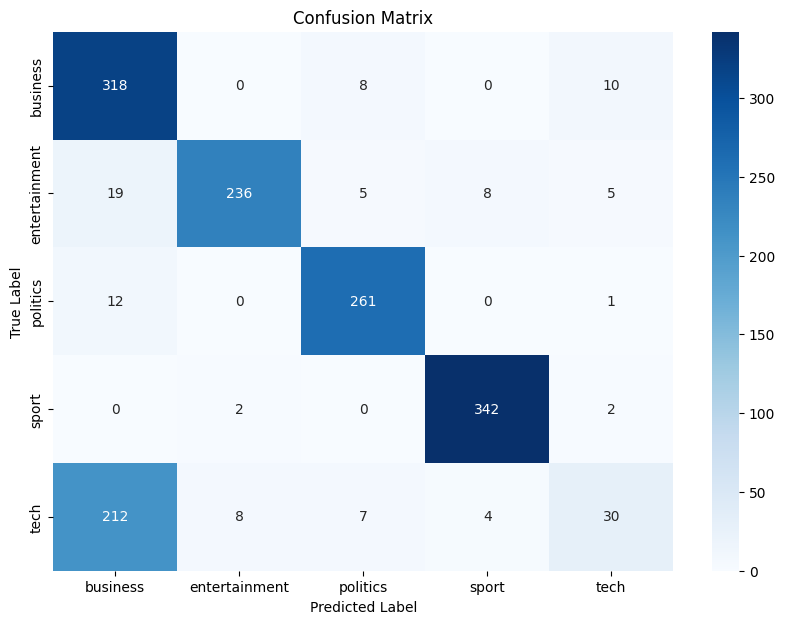

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# LDA for topic modeling
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_W_train = lda_model.fit_transform(tfidf_matrix)
lda_W_test = lda_model.transform(test_tfidf_matrix)

# Ensemble model with voting classifier
clf1 = LogisticRegression(max_iter=1000)
clf2 = SVC(probability=True)

ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2)], voting='soft')
ensemble_model.fit(lda_W_train, df['encoded_category'])

# Predict and evaluate
train_predictions = ensemble_model.predict(lda_W_train)
train_accuracy = accuracy_score(df['encoded_category'], train_predictions)
train_conf_matrix = confusion_matrix(df['encoded_category'], train_predictions)

print(f"Training Accuracy: {train_accuracy}")

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

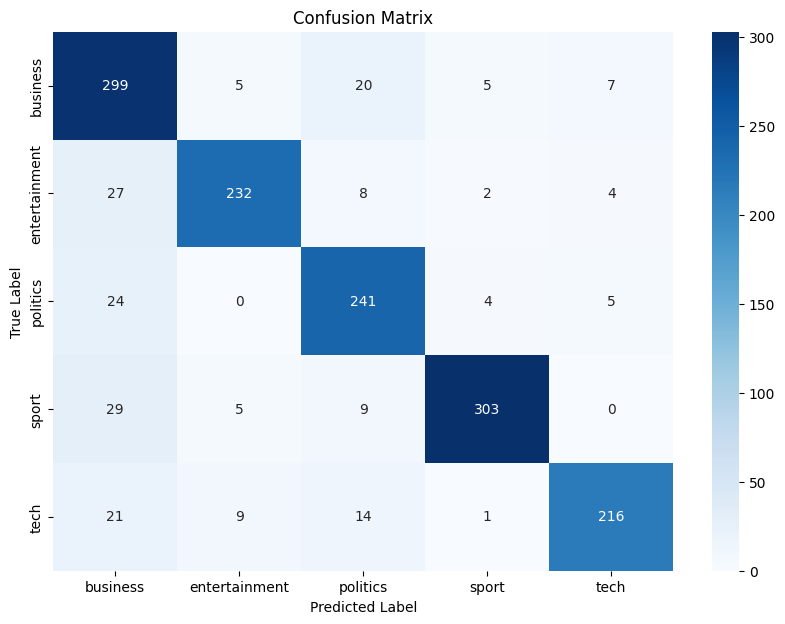

Number of Topics: 5, Training Accuracy: 0.7973154362416107
Number of Topics: 9, Training Accuracy: 0.7429530201342281
Number of Topics: 10, Training Accuracy: 0.8503355704697987
Number of Topics: 11, Training Accuracy: 0.8154362416107382
Number of Topics: 12, Training Accuracy: 0.6738255033557047
Number of Topics: 15, Training Accuracy: 0.6322147651006711
Number of Topics: 20, Training Accuracy: 0.8093959731543624
Number of Topics: 25, Training Accuracy: 0.8617449664429531
Number of Topics: 30, Training Accuracy: 0.8281879194630872
Number of Topics: 35, Training Accuracy: 0.8348993288590604
Number of Topics: 40, Training Accuracy: 0.77248322147651
Number of Topics: 45, Training Accuracy: 0.8375838926174497
Number of Topics: 50, Training Accuracy: 0.8429530201342282
Number of Topics: 55, Training Accuracy: 0.8731543624161073
Number of Topics: 60, Training Accuracy: 0.8845637583892617
Number of Topics: 65, Training Accuracy: 0.8657718120805369
Number of Topics: 70, Training Accuracy: 0.8

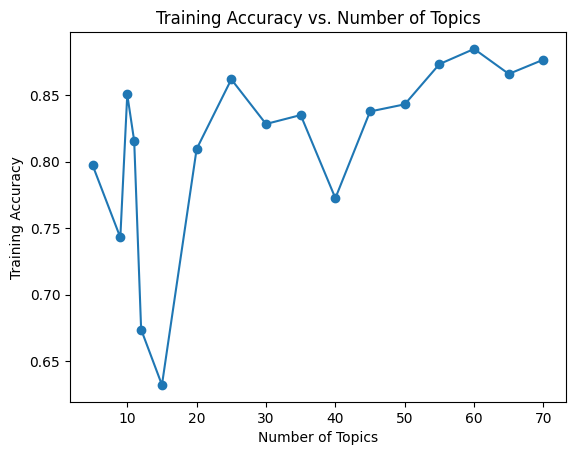

In [63]:
from sklearn.decomposition import NMF
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

# -----------------------------
# 1) Encode train categories
# -----------------------------
label_encoder = LabelEncoder()
df['encoded_category'] = label_encoder.fit_transform(df['Category'])

# -----------------------------
# 2) Set up and fit LDA
# -----------------------------
n_topics = 65 # Best result
lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)

# Fit on train TF-IDF, transform train
lda_W_train = lda_model.fit_transform(tfidf_matrix)

# -----------------------------
# 3) Ensemble Model
# -----------------------------
clf1 = LogisticRegression(max_iter=1000)
clf2 = SVC(probability=True)

ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('svc', clf2)], voting='soft')
ensemble_model.fit(lda_W_train, df['encoded_category'])

# Predict and evaluate
train_predictions = ensemble_model.predict(lda_W_train)
train_accuracy = accuracy_score(df['encoded_category'], train_predictions)
train_conf_matrix = confusion_matrix(df['encoded_category'], train_predictions)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(train_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# -----------------------------
# 4) Transform test set (UNLABELED)
# -----------------------------
lda_W_test = lda_model.transform(test_tfidf_matrix)
test_predictions = ensemble_model.predict(lda_W_test)

# -----------------------------
# 5) Experiment with different numbers of topics
# -----------------------------
results = []
for n_topics in [5, 9, 10, 11, 12, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]:
    lda_temp = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_W_temp = lda_temp.fit_transform(tfidf_matrix)
    ensemble_model.fit(lda_W_temp, df['encoded_category'])
    train_temp_predictions = ensemble_model.predict(lda_W_temp)
    
    acc_temp = accuracy_score(df['encoded_category'], train_temp_predictions)
    results.append((n_topics, acc_temp))
    print(f"Number of Topics: {n_topics}, Training Accuracy: {acc_temp}")

# -----------------------------
# 6) Plot the results - Accuracy vs. Number of Topics
# -----------------------------
x_vals, y_vals = zip(*results)
plt.plot(x_vals, y_vals, marker='o')
plt.title('Training Accuracy vs. Number of Topics')
plt.xlabel('Number of Topics')
plt.ylabel('Training Accuracy')
plt.show()

In [ ]:
# Transform the test data using the LDA model with 60 topics
lda_W_test = lda_model.transform(test_tfidf_matrix)

# Predict categories using the ensemble model
test_predictions = ensemble_model.predict(lda_W_test)

# Map encoded labels back to original category names
predicted_categories = label_encoder.inverse_transform(test_predictions)

# Assuming 'ArticleId' is a column in your test DataFrame
submission_df = pd.DataFrame({
    'ArticleId': test_df['ArticleId'],
    'Category': predicted_categories
})

# Save the submission file
submission_df.to_csv('submission.csv', index=False)